# Analyse van een FLUVIUS dataset

Energieverbruik van IDmeter 541449500001660041 is Energie_kWh    23933050.4
dtype: float64
Energieverbruik van IDmeter SUB(541448860012075359) is Energie_kWh    6245982.0
dtype: float64
Energieverbruik van IDmeter 541448860012075359 is Energie_kWh    42482753.84
dtype: float64


array(['541449500001660041', 'SUB(541448860012075359)',
       '541448860012075359'], dtype=object)

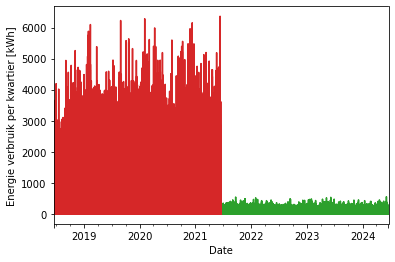

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

names=['From','To','meterID','seq','Bx','23','E12-E17','kWx','A_C_I','Plaats']
for i in np.arange(0,96):
    names.append('kwartier_'+str(i))
    
data=pd.read_csv('AMR_REPORTING_EXPORT.csv',delimiter=';',index_col=False)
data=data.iloc[:,:-5]
data.columns=names

data.From=pd.to_datetime(data['From'],format='%d%m%Y %H:%M')
data=data.sort_values('From')
data=data.fillna(0)

inter=data.A_C_I.unique()

dataAct_a=data.loc[data['A_C_I']=='A+']

dataInd_a=data.loc[data['A_C_I']=='I+']

dataCap_a=data.loc[data['A_C_I']=='C-']

dataX=data.loc[data['A_C_I'].isna()]


def transfoE(data,startDatum):
    dataA=[]
    for i in np.arange(0,data.iloc[:,0].size):
        temp=data.iloc[i,10:].transpose().values
        for j in np.arange(0,temp.size):
            if not(pd.isna(temp[j])):
                dataA.append(temp[j])
    dataA=np.array(dataA)
    datee=pd.date_range(start=startDatum,periods=dataA.size,freq='15T')
    dataA=pd.DataFrame({'Date':datee,'Energie_kWh':dataA})
    dataA=dataA.set_index('Date',drop=True)
    dataA.Energie_kWh.plot(label='afname')
    plt.ylabel('Energie verbruik per kwartier [kWh]')
    return dataA

# Elektriciteit
metID='541449500001660041'
tempo=dataAct_a[dataAct_a['meterID']==metID]
dataA=transfoE(dataAct_a[dataAct_a['meterID']==metID],dataAct_a[dataAct_a['meterID']==metID].From.iloc[0])



for i in np.arange(0,3):
    metID=data['meterID'].unique()[i]
    tempo=dataAct_a[dataAct_a['meterID']==metID]
    dataA=transfoE(dataAct_a[dataAct_a['meterID']==metID],dataAct_a[dataAct_a['meterID']==metID].From.iloc[0])

    print('Energieverbruik van IDmeter '+metID+' is '+str(dataA.sum()))
    
data['meterID'].unique()

In [ ]:



dataA=transfoE(dataAct_a[dataAct_a['meterID']==metID],dataAct_a[dataAct_a['meterID']==metID].From.iloc[0])
dataA.to_csv('ActieveAfname_ID'+metID+'.csv')

tempo=dataInd_a[dataInd_a['meterID']==metID]
dataI=transfoE(dataInd_a[dataInd_a['meterID']==metID],dataInd_a[dataInd_a['meterID']==metID].From.iloc[0])
dataI.to_csv('InductieveAfname_ID'+metID+'.csv')

tempo=dataCap_a[dataCap_a['meterID']==metID]
dataI=transfoE(dataCap_a[dataCap_a['meterID']==metID],dataCap_a[dataCap_a['meterID']==metID].From.iloc[0])
dataI.to_csv('CapacitieveAfname_ID'+metID+'.csv')